# Car Accident Severity Report

## Data Science Capstone Project for Coursera

### 1. Introduction and Business Understanding

With the increasing number of traffic on roads each year, there is an increase in number of accidents which occur due to various external factors such as weather conditions, road conditions, etc. There is a need to have a system in place which could predict the probability of an accident based on different factors, that would be a great tool for drivers. Such a system can make use of the real-time incoming data and alert drivers in real-time of the severity of an accident, which would decrease the probability of accidents occuring by a certain margin. This would also contribute to efficient traffic flow on roads, reducing the amount of time spent driving and in turn beneficial to the environment (reduced carbon emissions).

### 2. Data Understanding
The dataset used is from the SDOT Traffic Management Division. The dataset contains a parameter "Severity", which would be our target variable/predictor, which describes how severe an accident might occur based on certain conditions. The dataset has two different severity levels or codes - 1 and 2.
Code 1 : Property damage
Code 2 : Injury
We would use the variables / conditions - weather, light and road conditions to predict the severity of an accident. These would be out dependent variables. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as ticker
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
%matplotlib inline
#import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_451f054f57bf4e8897661efbcb545ebd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='G2drd56SSK20JifMN_c3gjNR3zI-xXDrujnVGlejsoko',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_451f054f57bf4e8897661efbcb545ebd.get_object(Bucket='pythonvisualizationassignment-donotdelete-pr-rssnshdzoqwhbv',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body)
df1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### 3. Data Preparation
In this section, we have already uploaded the original dataset as a dataframe. We would now delete all columns except the dependent variables. We drop all rows which contain the variable "Unknown" and "Other" as values, since these unknown conditions are not helpful for accurate prediction. We convert the categorical values into numerical values using one-hot encoding, and we drop all categorical values having less that 1% influence on the severity outcome. This also reduces the dataset to a certain extent, reducing computation efforts.

In [3]:
df = pd.DataFrame()
df = df1[['SEVERITYCODE','ROADCOND','LIGHTCOND','WEATHER','PERSONCOUNT','VEHCOUNT']].copy()
df.shape

(194673, 6)

In [4]:
df.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,PERSONCOUNT,VEHCOUNT
0,2,Wet,Daylight,Overcast,2,2
1,1,Wet,Dark - Street Lights On,Raining,2,2
2,1,Dry,Daylight,Overcast,4,3
3,1,Dry,Daylight,Clear,3,3
4,2,Wet,Daylight,Raining,2,2


In [5]:
df.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts(normalize=True)

SEVERITYCODE  LIGHTCOND               
1             Daylight                    0.586028
              Dark - Street Lights On     0.257030
              Unknown                     0.097187
              Dusk                        0.029893
              Dawn                        0.012673
              Dark - No Street Lights     0.009086
              Dark - Street Lights Off    0.006669
              Other                       0.001382
              Dark - Unknown Lighting     0.000053
2             Daylight                    0.675050
              Dark - Street Lights On     0.253512
              Dusk                        0.034047
              Dawn                        0.014431
              Unknown                     0.010596
              Dark - No Street Lights     0.005850
              Dark - Street Lights Off    0.005534
              Other                       0.000911
              Dark - Unknown Lighting     0.000070
Name: LIGHTCOND, dtype: float64

In [6]:
df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True)

SEVERITYCODE  ROADCOND      
1             Dry               0.637170
              Wet               0.239329
              Unknown           0.108116
              Ice               0.007062
              Snow/Slush        0.006315
              Other             0.000672
              Standing Water    0.000641
              Sand/Mud/Dirt     0.000392
              Oil               0.000302
2             Dry               0.701302
              Wet               0.275784
              Unknown           0.013111
              Ice               0.004779
              Snow/Slush        0.002923
              Other             0.000753
              Standing Water    0.000525
              Oil               0.000420
              Sand/Mud/Dirt     0.000403
Name: ROADCOND, dtype: float64

In [7]:
df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True)

SEVERITYCODE  WEATHER                 
1             Clear                       0.568316
              Raining                     0.165819
              Overcast                    0.143175
              Unknown                     0.107746
              Snowing                     0.005555
              Other                       0.005404
              Fog/Smog/Smoke              0.002883
              Sleet/Hail/Freezing Rain    0.000642
              Blowing Sand/Dirt           0.000309
              Severe Crosswind            0.000136
              Partly Cloudy               0.000015
2             Clear                       0.627627
              Raining                     0.195713
              Overcast                    0.153142
              Unknown                     0.014290
              Fog/Smog/Smoke              0.003275
              Snowing                     0.002995
              Other                       0.002031
              Sleet/Hail/Freezing Rain    0

In [8]:
# Replacing the unknown variables with NaN and eventually dropping those rows
df = df.replace(['Unknown', 'Other'], np.nan)
df = df.dropna()
df.shape

(169957, 6)

In [9]:
# One-hot encoding the categorical values and preparing our dataframe for the model
Feature = pd.concat([df, pd.get_dummies(df['LIGHTCOND']), pd.get_dummies(df['ROADCOND']), pd.get_dummies(df['WEATHER'])], axis=1)
Feature.drop(['Dark - Unknown Lighting','Dark - Street Lights Off','Dark - No Street Lights','LIGHTCOND','Standing Water','Oil','Sand/Mud/Dirt','ROADCOND',
        'Partly Cloudy','Severe Crosswind','Blowing Sand/Dirt','Sleet/Hail/Freezing Rain','WEATHER'], axis=1, inplace=True)
Feature.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,Dark - Street Lights On,Dawn,Daylight,Dusk,Dry,Ice,Snow/Slush,Wet,Clear,Fog/Smog/Smoke,Overcast,Raining,Snowing
0,2,2,2,0,0,1,0,0,0,0,1,0,0,1,0,0
1,1,2,2,1,0,0,0,0,0,0,1,0,0,0,1,0
2,1,4,3,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,3,3,0,0,1,0,1,0,0,0,1,0,0,0,0
4,2,2,2,0,0,1,0,0,0,0,1,0,0,0,1,0


In [10]:
Feature = Feature.rename(columns={'SEVERITYCODE' : 'SC', 'Dark - Street Lights On' : 'Dark', 'PERSONCOUNT' : 'Persons', 'VEHCOUNT' : 'Vehicles'})
Feature.head()

,SC,Persons,Vehicles,Dark,Dawn,Daylight,Dusk,Dry,Ice,Snow/Slush,Wet,Clear,Fog/Smog/Smoke,Overcast,Raining,Snowing
0,2,2,2,0,0,1,0,0,0,0,1,0,0,1,0,0
1,1,2,2,1,0,0,0,0,0,0,1,0,0,0,1,0
2,1,4,3,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,3,3,0,0,1,0,1,0,0,0,1,0,0,0,0
4,2,2,2,0,0,1,0,0,0,0,1,0,0,0,1,0


In [11]:
Feature.shape

(169957, 16)

In [12]:
# Preparing the X and y datasets for the model
y = Feature['SC'].values
y[0:8]
Feature = Feature.drop(['SC'], axis=1)
X = Feature

In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.35811011,  0.05158027, -0.61597105, -0.12000911,  0.71354465,
        -0.18540296, -1.58324162, -0.07996991, -0.07018105,  1.63366941,
        -1.33422795, -0.0571348 ,  2.30493093, -0.48761694, -0.06984158],
       [-0.35811011,  0.05158027,  1.62345292, -0.12000911, -1.401454  ,
        -0.18540296, -1.58324162, -0.07996991, -0.07018105,  1.63366941,
        -1.33422795, -0.0571348 , -0.43385248,  2.0507901 , -0.06984158],
       [ 1.06002029,  1.77895517, -0.61597105, -0.12000911,  0.71354465,
        -0.18540296,  0.63161554, -0.07996991, -0.07018105, -0.61211895,
        -1.33422795, -0.0571348 ,  2.30493093, -0.48761694, -0.06984158],
       [ 0.35095509,  1.77895517, -0.61597105, -0.12000911,  0.71354465,
        -0.18540296,  0.63161554, -0.07996991, -0.07018105, -0.61211895,
         0.74949711, -0.0571348 , -0.43385248, -0.48761694, -0.06984158],
       [-0.35811011,  0.05158027, -0.61597105, -0.12000911,  0.71354465,
        -0.18540296, -1.58324162, -0.07996991, 

In [14]:
y[0:5]

array([2, 1, 1, 1, 2])

### 4. Modelling
### Classification Algorithms - Machine Learning models
#### a) Decision Tree

In [15]:
# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=3)

In [16]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import metrics

tree = dtc(criterion='entropy', max_depth=5)
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)
print('Initial classification :   ', y_test[0:5])
print('Predicted classification : ', tree_pred[0:5])
print('Training set accuracy : ', metrics.accuracy_score(y_train, tree.predict(x_train)) )
print('Test set accuracy : ', metrics.accuracy_score(y_test,tree_pred))

Initial classification :    [1 1 1 1 1]
Predicted classification :  [1 1 1 1 1]
Training set accuracy :  0.7219023443081811
Test set accuracy :  0.7273083862869695


#### b) k-nearest neighbours

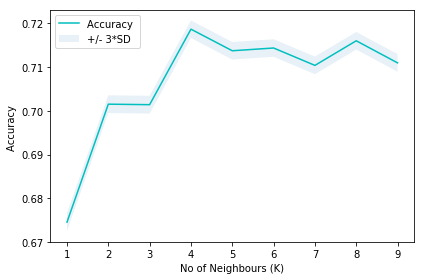

In [17]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier as knn

# Finding the best k to use for the model
k_max = 10
mean_acc = np.zeros((k_max-1))
std_acc = np.zeros((k_max-1))

for n in range(1,k_max):
    
    neig = knn(n_neighbors = n).fit(x_train,y_train)
    y_hat = neig.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
    
plt.plot(range(1,k_max),mean_acc,'c')
plt.fill_between(range(1,k_max),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3*SD'))
plt.ylabel('Accuracy ')
plt.xlabel('No of Neighbours (K)')
plt.tight_layout()
plt.show()

In [18]:
# Using the value of k=4 for the KNN model
neigh = knn(n_neighbors=4).fit(x_train,y_train)
knn_pred = neigh.predict(x_test)
print('Initial classification :   ', y_test[0:5])
print('Predicted classification : ', knn_pred[0:5])
print('Training set accuracy : ', metrics.accuracy_score(y_train, neigh.predict(x_train)) )
print('Test set accuracy : ', metrics.accuracy_score(y_test,knn_pred))

Initial classification :    [1 1 1 1 1]
Predicted classification :  [1 2 1 2 1]
Training set accuracy :  0.715354420059007
Test set accuracy :  0.7186004550090217


#### c) Support Vector Machine

In [26]:
from sklearn import svm

# Using Radial Basis Function (RBF) kernel function
sv2 = svm.SVC(kernel='rbf')
sv2.fit(x_train,y_train)
svm_pred2 = sv2.predict(x_test)
print('Initial classification :   ', y_test[0:5])
print('Predicted classification : ', svm_pred2[0:5])
print('Training set accuracy : ', metrics.accuracy_score(y_train, sv2.predict(x_train)) )
print('Test set accuracy : ', metrics.accuracy_score(y_test,svm_pred2))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Initial classification :    [1 1 1 1 1]
Predicted classification :  [1 1 1 1 1]
Training set accuracy :  0.7216417722263783
Test set accuracy :  0.7256413273711462


#### d) Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print('Initial classification :   ', y_test[0:5])
print('Predicted classification : ', lr_pred[0:5])
print('Training set accuracy : ', metrics.accuracy_score(y_train, lr.predict(x_train)) )
print('Test set accuracy : ', metrics.accuracy_score(y_test,lr_pred))

Initial classification :    [1 1 1 1 1]
Predicted classification :  [1 1 1 1 1]
Training set accuracy :  0.6740075145626172
Test set accuracy :  0.6801992625715855


### 5. Model Evaluation
 The entire original dataset (without split) will be used here for the model evaluation based on Jaccard score, F1 score and log loss (for Logistic regression). The same parameters for each model will be used for the evaluation.

In [20]:
from sklearn.metrics import jaccard_similarity_score as JCS
from sklearn.metrics import classification_report as CR
from sklearn.metrics import f1_score as F1
from sklearn.metrics import log_loss as LL

#### a) Jaccard scores

In [30]:
print('Jaccard similarity for Decision tree       : ', JCS(y_test,tree_pred))
print('Jaccard similarity for KNN                 : ', JCS(y_test,knn_pred))
print('Jaccard similarity for SVM                 : ', JCS(y_test,svm_pred2))
print('Jaccard similarity for Logistic Regression : ', JCS(y_test,lr_pred))

Jaccard similarity for Decision tree       :  0.7273083862869695
Jaccard similarity for KNN                 :  0.7186004550090217
Jaccard similarity for SVM                 :  0.7256413273711462
Jaccard similarity for Logistic Regression :  0.6801992625715855


In [21]:
X_t = X
Y_t = y

In [27]:
# Decision Tree
tree_eval = dtc(criterion='entropy', max_depth=5)
tree_eval.fit(X_t,Y_t)
tree_pred_eval = tree_eval.predict(X_t)
print('Jaccard similarity for Decision tree       : ', JCS(Y_t, tree_pred_eval))

# KNN
neigh_eval = knn(n_neighbors=4).fit(X_t,Y_t)
knn_eval = neigh_eval.predict(X_t)
print('Jaccard similarity for KNN                 : ', JCS(Y_t, knn_eval))

# Logistic Regression
lr_eval = LogisticRegression(C=0.01, solver='liblinear').fit(X_t,Y_t)
lr_pred_eval = lr_eval.predict(X_t)
print('Jaccard similarity for Logistic Regression : ', JCS(Y_t, lr_pred_eval))

# SVM
sv = svm.SVC(kernel='rbf')
sv.fit(X_t,Y_t)
svm_pred = sv.predict(X_t)
print('Jaccard similarity for Logistic Regression : ', JCS(Y_t, svm_pred))

Jaccard similarity for Decision tree       :  0.7235359532116947
Jaccard similarity for KNN                 :  0.7004477603158445
Jaccard similarity for Logistic Regression :  0.6758650717534436
Jaccard similarity for Logistic Regression :  0.7231770388980742


#### b) F1- Score

In [31]:
print('Jaccard similarity for Decision tree       : \n', CR(y_test,tree_pred))
print('Jaccard similarity for KNN                 : \n', CR(y_test,knn_pred))
print('Jaccard similarity for SVM                 : \n', CR(y_test,svm_pred2))
print('Jaccard similarity for Logistic Regression : \n', CR(y_test,lr_pred))

Jaccard similarity for Decision tree       : 
               precision    recall  f1-score   support

           1       0.72      0.97      0.83     34466
           2       0.78      0.22      0.35     16522

   micro avg       0.73      0.73      0.73     50988
   macro avg       0.75      0.60      0.59     50988
weighted avg       0.74      0.73      0.67     50988

Jaccard similarity for KNN                 : 
               precision    recall  f1-score   support

           1       0.72      0.94      0.82     34466
           2       0.68      0.25      0.37     16522

   micro avg       0.72      0.72      0.72     50988
   macro avg       0.70      0.60      0.59     50988
weighted avg       0.71      0.72      0.67     50988

Jaccard similarity for SVM                 : 
               precision    recall  f1-score   support

           1       0.72      0.96      0.83     34466
           2       0.75      0.23      0.35     16522

   micro avg       0.73      0.73      0.

In [32]:
print ('F1 Score for Decision tree      : \n', CR(Y_t, tree_pred_eval))
print('F1 Score for KNN                 : \n', CR(Y_t, knn_eval))
print('F1 Score for Logistic Regression : \n', CR(Y_t, lr_pred_eval))
print('F1 Score for SVM                 : \n', CR(Y_t, svm_pred))

F1 Score for Decision tree      : 
               precision    recall  f1-score   support

           1       0.72      0.97      0.82    114274
           2       0.77      0.22      0.34     55683

   micro avg       0.72      0.72      0.72    169957
   macro avg       0.75      0.59      0.58    169957
weighted avg       0.74      0.72      0.67    169957

F1 Score for KNN                 : 
               precision    recall  f1-score   support

           1       0.70      0.96      0.81    114274
           2       0.68      0.16      0.26     55683

   micro avg       0.70      0.70      0.70    169957
   macro avg       0.69      0.56      0.54    169957
weighted avg       0.70      0.70      0.63    169957

F1 Score for Logistic Regression : 
               precision    recall  f1-score   support

           1       0.68      0.97      0.80    114274
           2       0.54      0.08      0.14     55683

   micro avg       0.68      0.68      0.68    169957
   macro avg      

#### c) Log loss for Logistic regression

In [25]:
print('Log loss of Logistic Regression : ', LL(Y_t, lr_pred))

Log loss of Logistic Regression :  23.22337713038452
